In [88]:
#Phonon dispersion curve
import numpy as num
import pylab as lab


In [97]:
def D_comp(a,b,veck,vecR):
    kdotR=num.dot(veck,num.transpose(vecR))
    RR=num.outer(vecR,vecR)
    sinkR=num.sin(kdotR/2)
    I=num.eye(3)
    return sinkR*sinkR*(a*I+b*RR)
    

In [98]:
def AB(f,d):
    delta=0.0001
    deriv1=(-f(d+2*delta)+8*f(d+delta)-8*f(d-delta)+f(d-2*delta))/(12*delta)
    deriv2=(f(d+delta)-2*f(d)+f(d-delta))/(delta*delta)
    A=deriv1/d
    B=deriv2-A
    return [2*A,2*B]



In [262]:
def PhEnergy(f,d,Rnear,veck):
    energy=[]
    for k in veck:
        D=num.zeros(9).reshape(3,3)
        for R in Rnear:
            D+=D_comp(AB(f,d)[0],AB(f,d)[1],k,R)
        values=[]
        eigen=num.linalg.eig(D)
        for count in [0,1,2]:
            if (num.dot(eigen[1][:,count],num.transpose(k))==0):
                values.append([eigen[0][count],0])
            else:
                values.append([eigen[0][count],1])
        energy.append(values)
    
    return energy
            


In [263]:
data=num.loadtxt('EAM.dat')


In [264]:
from scipy.interpolate import interp1d
f=interp1d(data[0],data[1])
a=3.92
d=2.77

In [265]:
near=[[[x,y,0],[0,x,y],[x,0,y]] for x in [-1,1] for y in[-1,1]]

In [266]:
near=num.array(near).reshape(12,3)*a/2

In [267]:
T=num.array([0,0,0])
X=num.array([0,1,0])
L=num.array([2,2,2])
TX=num.dot(T-X,T-X)
XL=num.sqrt(num.dot(X-L,X-L))
LT=num.sqrt(num.dot(L-T,L-T))

In [302]:
kTX=2*(num.pi/a)*num.array([[0,x,0] for x in num.linspace(0,1,100,endpoint=True)])
kTL=2*(num.pi/a)*num.array([[x,x,x] for x in num.linspace(0,.5,100,endpoint=True)])

In [303]:
TXener=num.array(PhEnergy(f,d,near,kTX))
TLener=num.array(PhEnergy(f,d,near,kTL))


In [304]:
energy=[]
energy.append(TLener)
energy.append(TXener)
n=num.array(energy).size


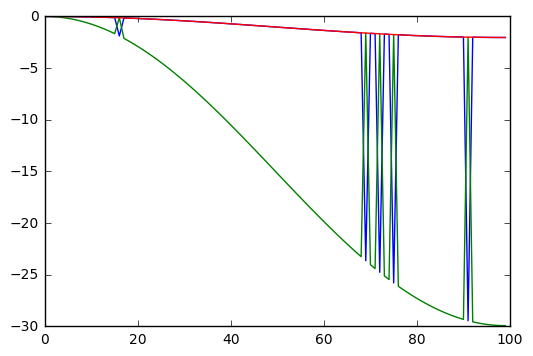

In [305]:
lab.plot(TLener[:,0][:,0])
lab.plot(TLener[:,1][:,0])
lab.plot(TLener[:,2][:,0])
lab.show()

In [306]:
num.array(energy)

array([[[[  0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00]],

        [[ -5.12625004e-04,   1.00000000e+00],
         [ -7.53246893e-03,   1.00000000e+00],
         [ -5.12625004e-04,   1.00000000e+00]],

        [[ -2.04998385e-03,   1.00000000e+00],
         [ -3.01222912e-02,   1.00000000e+00],
         [ -2.04998385e-03,   0.00000000e+00]],

        ..., 
        [[ -2.03436773e+00,   1.00000000e+00],
         [ -2.98928292e+01,   1.00000000e+00],
         [ -2.03436773e+00,   0.00000000e+00]],

        [[ -2.03590509e+00,   0.00000000e+00],
         [ -2.99154191e+01,   1.00000000e+00],
         [ -2.03590509e+00,   0.00000000e+00]],

        [[ -2.03641771e+00,   1.00000000e+00],
         [ -2.99229515e+01,   1.00000000e+00],
         [ -2.03641771e+00,   1.00000000e+00]]],


       [[[  0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.